# 📊 EDA and Data Visualization with SQL Integration  
## **Alibaba vs Amazon Stock Performance Analysis**

**Author:** Satelite Alison Ndayikunda

---

### 🧠 **Project Overview**  
This project explores and visualizes the stock performance of **Alibaba (BABA)** and **Amazon (AMZN)** from **2014–2025**.  
By comparing these two e-commerce giants, the analysis highlights how **different market environments (U.S. vs. China)**, **volatility**, and **investor behavior** shape their stock trends.  

Data is stored in **Microsoft SQL Server (MSSQL)** and queried into Python via **SQLAlchemy**, combining **SQL data management** with **Python-based analytics and visualization** for a full-stack approach.  

---

### 🎯 **Objectives**
- Retrieve and clean historical stock data from MSSQL.  
- Conduct Exploratory Data Analysis (EDA) to identify patterns and trends.  
- Visualize and compare stock performance between Alibaba and Amazon.  

**Key Questions**  
1. What are the relationships between price movement and trading volume?  
2. How have their stock prices evolved over time?  
3. Which company shows higher volatility and better daily returns?  
4. How correlated are Alibaba and Amazon stocks?  
5. Which company has shown stronger growth overall since 2014?



## Step 1: Importing Libraries and datasets

In [112]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from sqlalchemy import create_engine


### I. Data importation from MSSQL database
In this section, a secure connection  was established between Python and Microsoft SQL Server using SQLAlchemy.
The historical stock data for Alibaba and Amazon was stored in two SQL tables (Alibaba_Stock and Amazon_Stock) within the same database.
Instead of importing CSV files directly, SQL queries were used to extract the data, ensuring a more reliable and scalable integration.

In [113]:

# Define the connection string
server = 'DESKTOP-FE1PF64'              #  server name
database = 'AlibabaFinanceDB'           #  database name
driver = 'ODBC Driver 17 for SQL Server'

# Create SQLAlchemy engine
engine = create_engine(f"mssql+pyodbc://@{server}/{database}?driver={driver}&trusted_connection=yes")

print("Connection to database established successfully.")

Connection to database established successfully.


In [114]:
#Open connection
conn = engine.connect()

# Load your tables
alibaba_df = pd.read_sql("SELECT * FROM Alibaba_Stock;", conn)
amazon_df = pd.read_sql("SELECT * FROM Amazon_Stock;", conn)

# Close when done
conn.close()

print("Data loaded successfully.")

Data loaded successfully.


In [115]:
# Preview the first few rows
print("Alibaba Data:")
alibaba_df.head()

Alibaba Data:


,Date,Adj_Close,Close,High,Low,Open,Volume
0,2014-09-19,90.673950,93.889999,99.699997,89.949997,92.699997,271879400
1,2014-09-22,86.810966,89.889999,92.949997,89.500000,92.699997,66657800
2,2014-09-23,84.184128,87.169998,90.480003,86.620003,88.940002,39009800
3,2014-09-24,87.467667,90.570000,90.570000,87.220001,88.470001,32088000
4,2014-09-25,85.874191,88.919998,91.500000,88.500000,91.089996,28598000


In [116]:
# Preview the first few rows
print("Amazon Data:")
amazon_df.head()

Amazon Data:


,date,open,high,low,close,adj_close,volume
0,2000-01-03 08:00:00,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04 08:00:00,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05 08:00:00,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
3,2000-01-06 08:00:00,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
4,2000-01-07 08:00:00,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


## Step2: Data Cleaning and Preparation

Before analysis, we clean both datasets by standardizing column names, fixing date formats, removing unnecessary columns, and handling missing values to ensure data consistency.

In [117]:
#Checking the info and statistics of Alibaba data
print("Alibaba Data Info:")
alibaba_df.info()
print("\nAlibaba Data Description:")
alibaba_df.describe()

Alibaba Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2617 entries, 0 to 2616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2617 non-null   object 
 1   Adj_Close  2617 non-null   float64
 2   Close      2617 non-null   float64
 3   High       2617 non-null   float64
 4   Low        2617 non-null   float64
 5   Open       2617 non-null   float64
 6   Volume     2617 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 143.2+ KB

Alibaba Data Description:


,Adj_Close,Close,High,Low,Open,Volume
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03
mean,130.763001,135.153905,136.919684,133.360942,135.248746,1.899231e+07
std,56.741744,58.951556,59.579593,58.244218,59.037467,1.291504e+07
min,55.424198,57.389999,58.650002,57.200001,57.299999,3.775300e+06
25%,82.445793,84.849998,85.699997,84.000000,85.000000,1.186070e+07
50%,105.469185,108.989998,110.650002,107.260002,108.500000,1.600840e+07
75%,173.061798,179.199997,181.389999,177.000000,179.369995,2.172430e+07
max,306.276886,317.140015,319.320007,308.910004,313.500000,2.718794e+08


In [118]:
#Checking the info and statistics of Amazon data
print("Amazon Data Info:")
amazon_df.info()
print("\nAmazon Data Description:")
amazon_df.describe()

Amazon Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6321 non-null   datetime64[ns]
 1   open       6321 non-null   float64       
 2   high       6321 non-null   float64       
 3   low        6321 non-null   float64       
 4   close      6321 non-null   float64       
 5   adj_close  6321 non-null   float64       
 6   volume     6321 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 345.8 KB

Amazon Data Description:


,date,open,high,low,close,adj_close,volume
count,6321,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6.321000e+03
mean,2012-07-26 14:02:22.382534656,44.736023,45.251977,44.176568,44.729400,44.729400,1.180771e+08
min,2000-01-03 08:00:00,0.295500,0.305000,0.275500,0.298500,0.298500,1.500750e+07
25%,2006-04-18 07:00:00,2.363500,2.415500,2.306000,2.364000,2.364000,6.215930e+07
50%,2012-07-25 07:00:00,11.602000,11.737500,11.420000,11.595000,11.595000,9.595200e+07
75%,2018-11-02 07:00:00,85.140503,85.779999,83.903000,84.817497,84.817497,1.433920e+08
max,2025-02-19 08:00:00,239.020004,242.520004,238.029999,242.059998,242.059998,2.086584e+09
std,NaN,59.578629,60.241809,58.852822,59.562415,59.562415,9.758263e+07


In [119]:
# print the number of rows and columns of both datasets
print(f'Alibaba has {alibaba_df.shape[0]} rows and {alibaba_df.shape[1]} columns.')
print(f'Amazon has {amazon_df.shape[0]} rows and {amazon_df.shape[1]} columns.')

Alibaba has 2617 rows and 7 columns.
Amazon has 6321 rows and 7 columns.


In [120]:
# print the first and last dates in both datasets
print(f'Alibaba data ranges from {alibaba_df.Date.min()} to {alibaba_df.Date.max()}')
print(f'Amazon data ranges from {amazon_df.date.min()} to {amazon_df.date.max()}')

Alibaba data ranges from 2014-09-19 to 2025-02-13
Amazon data ranges from 2000-01-03 08:00:00 to 2025-02-19 08:00:00


In [121]:
# check for duplicates
print(f' There are {alibaba_df.duplicated().sum()} duplicates in the Alibaba dataset.')
print(f' There are {amazon_df.duplicated().sum()} duplicates in the Amazon dataset.')

 There are 0 duplicates in the Alibaba dataset.
 There are 0 duplicates in the Amazon dataset.


In [122]:
# check for missing values
print(f'Alibaba missing values in each column{alibaba_df.isnull().sum()}')
print(f'Amazon missing values in each column {alibaba_df.isnull().sum()}')

Alibaba missing values in each columnDate         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Amazon missing values in each column Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


#### I. Observation Before Cleaning

From the initial inspection of the two datasets, several differences were observed between Amazon and Alibaba stock data:

- Both datasets don't have duplicates or missing values

- The Amazon dataset contains significantly more rows than Alibaba — Amazon has data spanning from 2000 to 2025, while Alibaba has about 2,617 rows covering 2014 to 2025.

- The rows are ordered differently, and the column names use inconsistent letter cases (e.g., Close vs close), which can affect merging and comparisons.

- The date column in the Amazon dataset is stored in datetime format, whereas Alibaba’s is in date format. This difference needs to be standardized.

- To make both datasets comparable, Amazon’s date range will trimmed to match Alibaba’s timeframe (2014–2025).

- Both datasets will also be sorted chronologically to ensure consistency and reliability in the analysis.



#### II. Data Cleaning and Standardization

In [123]:
# 1. Standardize column names
# Convert all column names to lowercase for consistency

amazon_df.columns = amazon_df.columns.str.lower()
alibaba_df.columns = alibaba_df.columns.str.lower()

print('conversion successful')

conversion successful


In [124]:
# 2 Sort both datasets by date

alibaba_df = alibaba_df.sort_values('date')
amazon_df = amazon_df.sort_values('date')

print('sorted successfully')

sorted successfully


In [125]:
# 3 Convert 'date' columns to datetime objects (then keep only date part)

alibaba_df['date'] = pd.to_datetime(alibaba_df['date']).dt.date
amazon_df['date'] = pd.to_datetime(amazon_df['date']).dt.date

print('date conversion successful')

date conversion successful


In [126]:
# Trim Amazon's data to match Alibaba's date range (2014-09-19) to (2025-02-13)

import datetime

amazon_df = amazon_df[
                        (amazon_df['date'] >= datetime.date(2014,9,19))&
                        (amazon_df['date'] <= datetime.date(2025,2,13))
]

print('trimmed successfully')

trimmed successfully


In [127]:
# check the first 5 rows and shape of the Amazon dataset
print(amazon_df.head())

print(f'The Amazon dataset has {amazon_df.shape[0]} rows and {amazon_df.shape[1]} columns')

            date       open       high        low      close  adj_close  \
3701  2014-09-19  16.379999  16.638000  16.278500  16.566000  16.566000   
3702  2014-09-22  16.424500  16.474501  16.052999  16.225000  16.225000   
3703  2014-09-23  16.122999  16.379999  16.062500  16.181499  16.181499   
3704  2014-09-24  16.208500  16.472000  15.978000  16.410500  16.410500   
3705  2014-09-25  16.399500  16.427000  16.070000  16.096500  16.096500   

         volume  
3701  137724000  
3702   62194000  
3703   47052000  
3704   52844000  
3705   58576000  
The Amazon dataset has 2617 rows and 7 columns


In [128]:
# check the first 5 rows and shape of the Amazon dataset
print(alibaba_df.head())

print(f'The Alibaba dataset has {alibaba_df.shape[0]} rows and {alibaba_df.shape[1]} columns')

         date  adj_close      close       high        low       open  \
0  2014-09-19  90.673950  93.889999  99.699997  89.949997  92.699997   
1  2014-09-22  86.810966  89.889999  92.949997  89.500000  92.699997   
2  2014-09-23  84.184128  87.169998  90.480003  86.620003  88.940002   
3  2014-09-24  87.467667  90.570000  90.570000  87.220001  88.470001   
4  2014-09-25  85.874191  88.919998  91.500000  88.500000  91.089996   

      volume  
0  271879400  
1   66657800  
2   39009800  
3   32088000  
4   28598000  
The Alibaba dataset has 2617 rows and 7 columns


In [129]:
# checking the data types
amazon_df.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object

In [130]:
alibaba_df.dtypes

date          object
adj_close    float64
close        float64
high         float64
low          float64
open         float64
volume         int64
dtype: object

#### iii. Merging the Two Datasets

Goal

- To combine Amazon and Alibaba stock data into a single DataFrame for easier comparison and analysis.

Merging allows you to visualize trends, compare prices, calculate correlations, and analyze both companies side by side.

In [131]:
# Step 1: Add a 'company' column to each dataset

alibaba_df['company'] = 'Alibaba'
amazon_df['company'] = 'Amazon'

In [132]:
#Step 2: Merge (concatenate) both datasets vertically
# We use pd.concat because both DataFrames have identical columns

df = pd.concat([amazon_df, alibaba_df], ignore_index=True)


In [133]:
# Step 3: Inspect the combined data
print("Combined DataFrame shape:", df.shape)
print(df.head())


Combined DataFrame shape: (5234, 8)
         date       open       high        low      close  adj_close  \
0  2014-09-19  16.379999  16.638000  16.278500  16.566000  16.566000   
1  2014-09-22  16.424500  16.474501  16.052999  16.225000  16.225000   
2  2014-09-23  16.122999  16.379999  16.062500  16.181499  16.181499   
3  2014-09-24  16.208500  16.472000  15.978000  16.410500  16.410500   
4  2014-09-25  16.399500  16.427000  16.070000  16.096500  16.096500   

      volume company  
0  137724000  Amazon  
1   62194000  Amazon  
2   47052000  Amazon  
3   52844000  Amazon  
4   58576000  Amazon  


In [134]:
# Ensure all companies are included
print(df['company'].value_counts())

company
Amazon     2617
Alibaba    2617
Name: count, dtype: int64


In [135]:
#  Keep only the key columns needed for analysis
# These focus on performance (adj_close), trading activity (volume), and comparison (company)

df = df[['date', 'adj_close', 'volume', 'company']]

# Verify the change
print("Columns kept for analysis:")
print(df.columns)


Columns kept for analysis:
Index(['date', 'adj_close', 'volume', 'company'], dtype='object')


#### Data cleaning complete!!!

## Step 3: Exploratory Data Analysis (EDA)

Goal

- To understand the structure, trends, and key characteristics of the dataset before doing deeper analysis or modeling.
- This helps to uncover relationships, outliers, and general behavior of Amazon vs Alibaba stock performance.

In [136]:
# Check dataset shape, column types, and summary statistics 
# to confirm data types and overall structure

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5234 non-null   object 
 1   adj_close  5234 non-null   float64
 2   volume     5234 non-null   int64  
 3   company    5234 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 163.7+ KB
None
         adj_close        volume
count  5234.000000  5.234000e+03
mean    115.534069  4.741372e+07
std      58.689179  4.156017e+07
min      14.347500  3.775300e+06
25%      77.457960  1.600570e+07
50%      99.394650  3.617600e+07
75%     163.643188  6.612150e+07
max     306.276886  4.771220e+08


In [137]:
# check the number of rows and columns
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the merged dataset')

There are 5234 rows and 4 columns in the merged dataset


In [138]:
# check for duplicates
df.duplicated().any()

np.False_

#### a. Univariate Analysis

Goal

- To understand each variable on its own — its distribution, central tendency (mean, median, mode), and spread (min, max, standard deviation).
- It will help us know if there are outliers, missing values, or skewed data before doing deeper analysis.

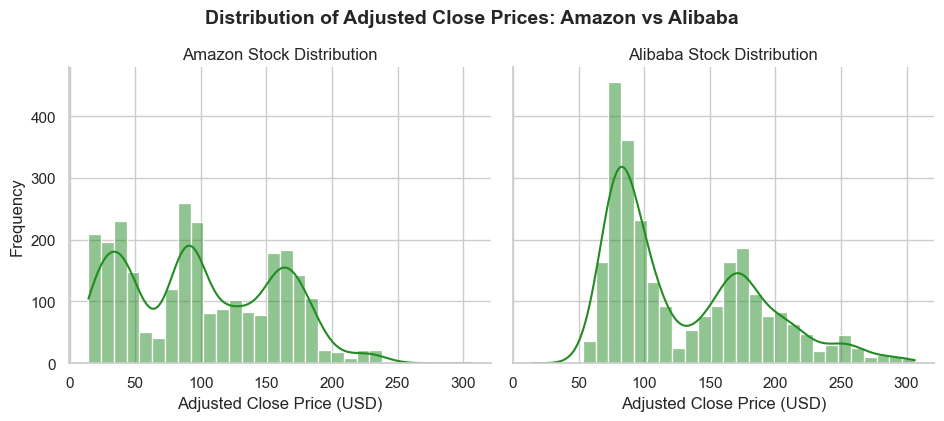

In [139]:

# Histogram comparing Adjusted Close price distributions for both companies
sns.set_theme(style="whitegrid")

# Use FacetGrid for side-by-side plots
g = sns.displot(
    data=df,
    x='adj_close',
    col='company',         # separate plot for each company
    color='#228B22',       # dark green tone
    bins=30,
    kde=True,              # add smooth curve
    height=4,
    aspect=1.2
)

g.set_titles("{col_name} Stock Distribution")
g.set_axis_labels("Adjusted Close Price (USD)", "Frequency")
plt.suptitle("Distribution of Adjusted Close Prices: Amazon vs Alibaba", fontsize=14, weight='bold', y=1.05)
plt.show()


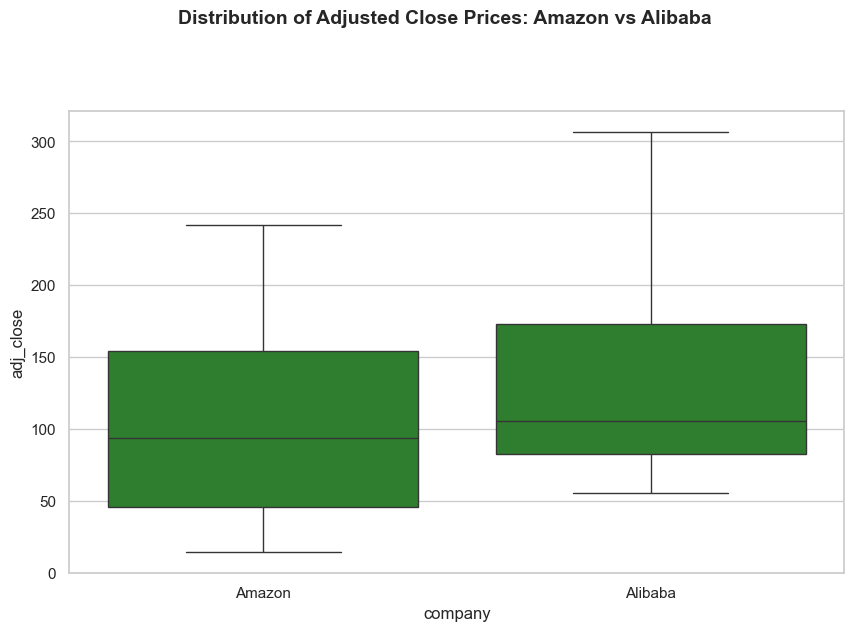

In [140]:

# create boxplots
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='company',
    y='adj_close',         # separate plot for each company
    color='#228B22')       # dark green tone

plt.suptitle("Distribution of Adjusted Close Prices: Amazon vs Alibaba", fontsize=14, weight='bold', y=1.05)
plt.show()

##### Summary of the  Adjusted Close Distribution Analysis

The histograms and boxplots reveal key differences between Amazon and Alibaba stocks.

- Amazon’s box (≈40–150 USD) is wider, showing greater price volatility, while Alibaba’s box (≈80–175 USD) is narrower, indicating more price stability. 
- Amazon’s median lies near the center, suggesting a balanced  as seen in the histogram, whereas Alibaba’s median is lower, meaning most prices are above average — a slight downward skew.
-  Additionally, Amazon’s maximum whisker is closer to the box, implying fewer extreme highs, while Alibaba’s longer upper whisker shows occasional sharp price spikes. O
- Overall, Amazon’s stock fluctuates more, whereas Alibaba’s remains steadier but occasionally experiences high peaks.

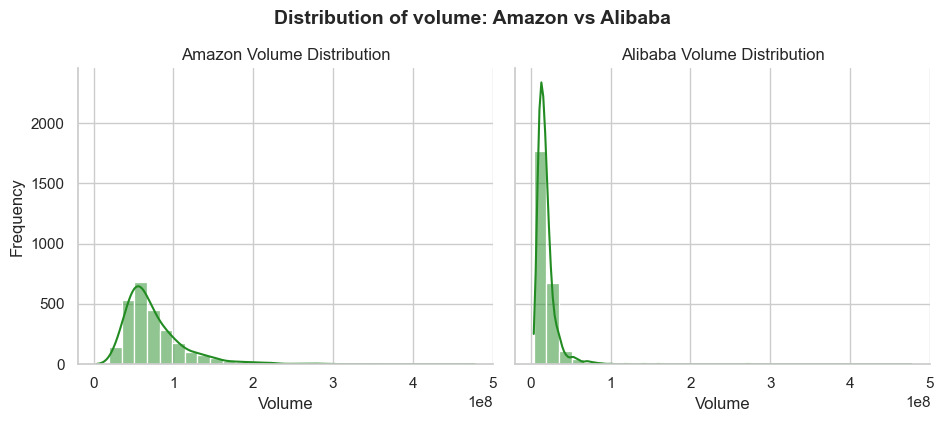

In [141]:

# Histogram comparing volume distributions for both companies
sns.set_theme(style="whitegrid")

# Use FacetGrid for side-by-side plots
g = sns.displot(
    data=df,
    x='volume',
    col='company',         # separate plot for each company
    color='#228B22',       # dark green tone
    bins=30,
    kde=True,              # add smooth curve
    height=4,
    aspect=1.2
)

g.set_titles("{col_name} Volume Distribution")
g.set_axis_labels("Volume", "Frequency")
plt.suptitle("Distribution of volume: Amazon vs Alibaba", fontsize=14, weight='bold', y=1.05)
plt.show()




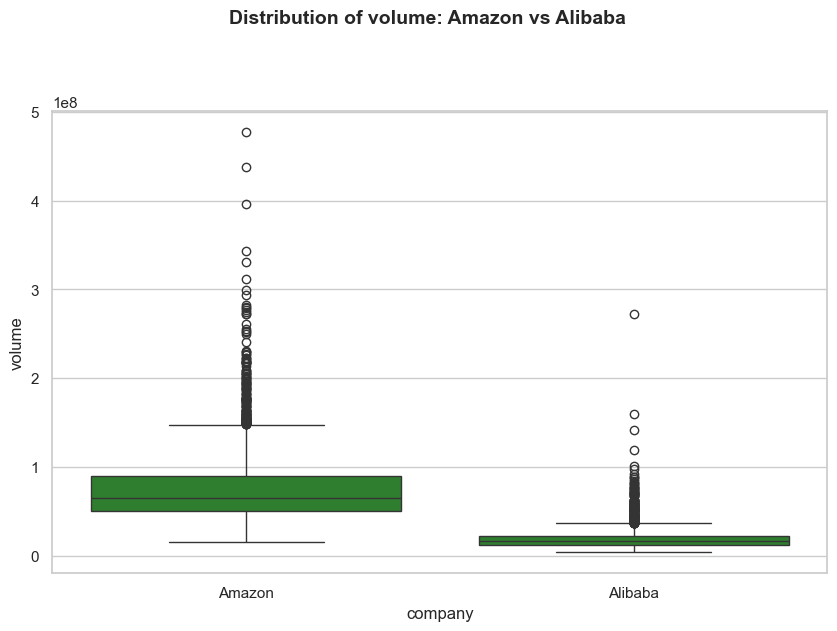

In [142]:

# create boxplots
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='company',
    y='volume',         # separate plot for each company
    color='#228B22')       # dark green tone

plt.suptitle("Distribution of volume: Amazon vs Alibaba", fontsize=14, weight='bold', y=1.05)
plt.show()

##### Summary of the Volume Distribution Analysis

- The histograms show that both Alibaba and Amazon trading volumes are right-skewed, meaning most trading days have lower volumes with occasional days of very high activity. 
- Alibaba’s higher peak suggests its trading volume is more concentrated around a typical level, while Amazon’s flatter curve indicates a broader and more varied trading activity.

From the boxplots, 

- Amazon’s larger and higher box shows greater overall trading activity and higher variability in volume compared to Alibaba. 
- It also has more outliers, suggesting frequent days of unusually high trading. 
-  Both companies’ median lines are near the center, indicating a relatively balanced spread of daily trading volumes.


Overall, Amazon experiences higher and more varied trading volumes, while Alibaba’s trading is steadier but more concentrated around typical levels.

#### b. Bivariate Analysis

Goal 

To explore relationships between key stock indicators — such as how trading volume relates to price movements, and how Alibaba and Amazon differ in their volatility and trends over time.

Rather than comparing absolute prices, the focus is on patterns, returns, and correlations, providing a fair basis for performance comparison.

So instead of comparing “which stock is higher”, we’ll compare:

- How their prices move over time (trends and volatility).
- Their daily returns (%) — to measure relative performance.
- Correlation between volume and price movement — to see if trading activity affects price changes.

### **Key Qst 1**: What are the relationships between price movement and trading volume?

##### Step 1: Scatterplot (adj_close vs volume)

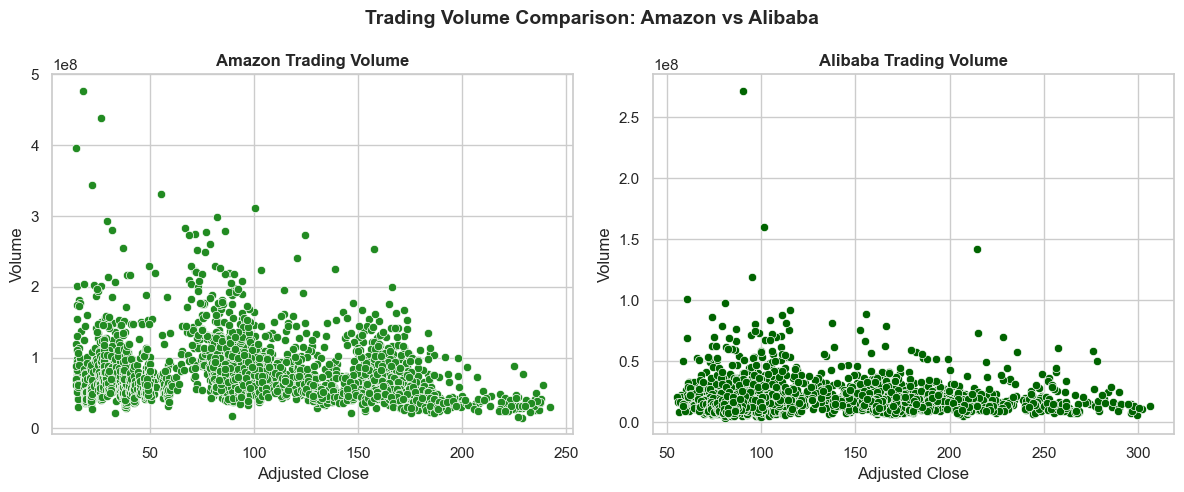

In [143]:
plt.figure(figsize=(12,5))

# Amazon
plt.subplot(1,2,1)
sns.scatterplot(data=df[df['company']=='Amazon'], x='adj_close', y='volume', color='#228B22')
plt.title("Amazon Trading Volume", fontsize=12, weight='bold')
plt.xlabel("Adjusted Close")
plt.ylabel("Volume")

# Alibaba
plt.subplot(1,2,2)
sns.scatterplot(data=df[df['company']=='Alibaba'], x='adj_close', y='volume', color='#006400')
plt.title("Alibaba Trading Volume", fontsize=12, weight='bold')
plt.xlabel("Adjusted Close")
plt.ylabel("Volume")

plt.suptitle("Trading Volume Comparison: Amazon vs Alibaba", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


##### Step 2: Correlation Analysis between adj_close and volume

To understand how stock prices and trading activity relate, we calculated the **Pearson correlation** between `adj_close` (adjusted closing price) and `volume` for each company.


In [144]:
# Correlation between Adjusted Close and Volume for each company
correlation = df.groupby('company')[['adj_close', 'volume']].corr().iloc[0::2, -1]
print(correlation)


company           
Alibaba  adj_close   -0.019452
Amazon   adj_close   -0.220128
Name: volume, dtype: float64


####  **Answer for Question 1**

**What are the relationships between price movement and trading volume?**
| Company | Correlation | Interpretation |
|----------|-------------|----------------|
| **Alibaba** | -0.019 | Almost no correlation — changes in price have little to no effect on trading volume. |
| **Amazon**  | -0.220 | Weak negative correlation — as prices slightly rise, trading volume tends to decrease slightly. |

####  Insights
- **Alibaba’s** trading behavior appears stable regardless of price fluctuations.  
- **Amazon’s** weak negative relationship may suggest that higher prices lead to lower trading activity, possibly because investors trade less when prices are high.  
- In both cases, the correlation is weak, meaning **price and volume move mostly independently**.


 ### **Key Qst 2**: How have their stock prices evolved over time?

 Goal

To visualize and compare how Alibaba and Amazon’s adjusted closing prices have changed from 2014 to 2025 identifying general trends, growth patterns, and periods of volatility.

In [145]:
# Calculate 30-day rolling mean for adjusted close price
df['rolling_mean'] = (
    df.groupby('company')['adj_close']
    .transform(lambda x: x.rolling(window=30, min_periods=1).mean())
)

# Display the first few rows to confirm
df.head()


,date,adj_close,volume,company,rolling_mean
0,2014-09-19,16.566000,137724000,Amazon,16.566000
1,2014-09-22,16.225000,62194000,Amazon,16.395500
2,2014-09-23,16.181499,47052000,Amazon,16.324167
3,2014-09-24,16.410500,52844000,Amazon,16.345750
4,2014-09-25,16.096500,58576000,Amazon,16.295900


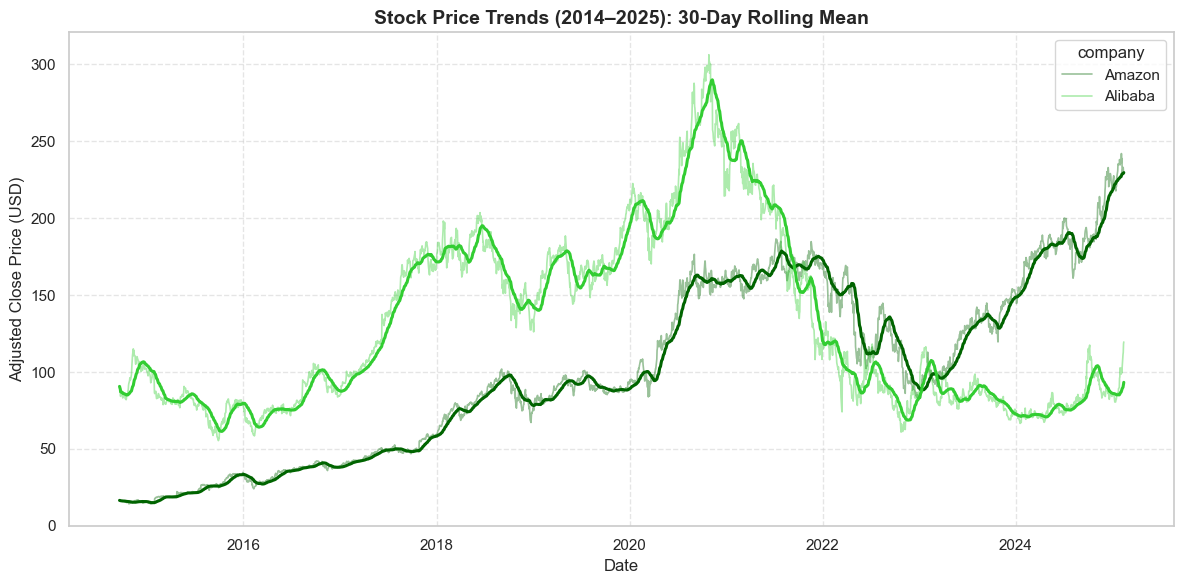

In [146]:
# 📈 Visualize Adjusted Close Price Trends with Rolling Mean
plt.figure(figsize=(12,6))
custom_palette = {
    'Amazon': '#006400',    # dark green
    'Alibaba': '#32CD32' }   # light green

# Plot actual adjusted close prices
sns.lineplot(data=df, x='date', y='adj_close', hue='company', palette=custom_palette, alpha=0.4, linewidth=1.2)

# Plot 30-day rolling mean
sns.lineplot(data=df, x='date', y='rolling_mean', hue='company', palette=custom_palette, linewidth=2.2, legend=False)

# Customize the chart
plt.title("Stock Price Trends (2014–2025): 30-Day Rolling Mean", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (USD)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


####  **Answer for Question 2**
**How have their stock prices evolved over time?**

From 2014 to 2025, Amazon’s stock shows steady long-term growth with a brief dip around 2020–2021, likely due to the COVID-19 pandemic, followed by a strong recovery. Alibaba’s stock peaked around the same period but declined sharply afterward, partly influenced by pandemic effects and regulatory pressures. Overall, Amazon has shown more stable growth and faster recovery, while Alibaba’s performance has been more volatile.

### **Key Qst 3**:  Which company shows higher volatility and better daily returns?

We want to measure and compare:

- Volatility — how much prices fluctuate day to day.

- Daily returns — the percentage change in price from one day to the next.

These metrics help identify which stock is riskier (more volatile) and which provides better short-term gains (higher returns).

In [147]:
# Calculate daily returns for each company
df['daily_returns']= df.groupby('company')['adj_close'].pct_change() * 100

df.head()

,date,adj_close,volume,company,rolling_mean,daily_returns
0,2014-09-19,16.566000,137724000,Amazon,16.566000,NaN
1,2014-09-22,16.225000,62194000,Amazon,16.395500,-2.058431
2,2014-09-23,16.181499,47052000,Amazon,16.324167,-0.268110
3,2014-09-24,16.410500,52844000,Amazon,16.345750,1.415197
4,2014-09-25,16.096500,58576000,Amazon,16.295900,-1.913404


In [148]:
#Compare Volatility
#Volatility is simply the standard deviation of daily returns — higher values mean higher risk.

volatility = df.groupby('company')['daily_returns'].std()
print(volatility)

company
Alibaba    2.616061
Amazon     2.052983
Name: daily_returns, dtype: float64


In [149]:
#Compare Average Daily Returns
#To see which performs better on average:

avg_daily_returns = df.groupby('company')['daily_returns'].mean()
print(avg_daily_returns)

company
Alibaba    0.044150
Amazon     0.121647
Name: daily_returns, dtype: float64


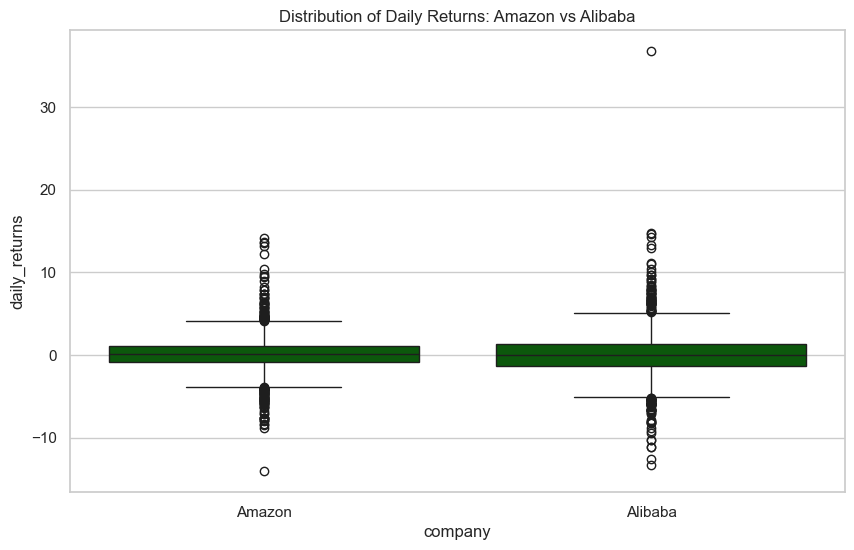

In [150]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='company', y='daily_returns', color = '#006400' )
plt.title("Distribution of Daily Returns: Amazon vs Alibaba")
plt.show()



####  **Answer for Question 3**
**Which company shows higher volatility and better daily returns?**

| Company | Average Daily Return (%) | Standard Deviation | Interpretation |
|----------|--------------------------|--------------------|----------------|
| **Amazon** | 0.12 | 2.05 | Higher average return and lower volatility — more stable performance. |
| **Alibaba** | 0.04 | 2.62 | Lower average return and higher volatility — riskier with larger price swings. |

**Conclusion:**  
Amazon shows slightly better daily returns and lower volatility, making it the more stable investment.  
Alibaba’s higher volatility indicates greater risk and potential for sudden price changes.


### **Key Qst 4**:  How correlated are Alibaba and Amazon stocks?

In [151]:
# Pivot the data so each company becomes a column
returns_pivot = df.pivot(index='date', columns='company', values='daily_returns')

returns_pivot.head()


company,Alibaba,Amazon
date,,
2014-09-19,NaN,NaN
2014-09-22,-4.260302,-2.058431
2014-09-23,-3.025930,-0.268110
2014-09-24,3.900425,1.415197
2014-09-25,-1.821788,-1.913404


In [152]:
# Drop rows with missing values
returns_pivot = returns_pivot.dropna()

# Calculate correlation
correlation = returns_pivot['Amazon'].corr(returns_pivot['Alibaba'])

print("Correlation between Alibaba and Amazon daily returns:", round(correlation, 2))

Correlation between Alibaba and Amazon daily returns: 0.35


####  **Answer for Question 4**

**How correlated are Alibaba and Amazon stocks?**

The correlation between Alibaba and Amazon’s **daily returns** is **0.35**.  
This indicates a **moderate positive relationship**, meaning the two stocks sometimes move in the same direction, but not consistently.  

In other words, while both are influenced by broader market trends, their price movements are largely independent, likely due to differences in market focus, regional factors, and company performance.


### **Key Qst 5**:  Which company has shown stronger growth overall since 2014?

In [153]:
# Calculate overall stock growth (in %) for each company since 2014
growth = df.groupby('company')['adj_close'].apply(
    lambda x: ((x.iloc[-1] - x.iloc[0]) / x.iloc[0]) * 100
)

# Display the growth percentages for Amazon and Alibaba
growth


company
Alibaba      31.834999
Amazon     1290.619313
Name: adj_close, dtype: float64

####  **Answer for Question 5**


**Which company has shown stronger growth overall since 2014?**

Using the adjusted closing prices, Amazon’s cumulative growth from 2014 to 2025 is approximately **1,290%**, while Alibaba’s growth is around **31.8%**.

This large gap reflects their contrasting long-term performance.  
- **Amazon** maintained steady growth driven by global expansion, diversification into cloud computing (AWS), and strong investor confidence.  
- **Alibaba**, despite strong gains before 2021, experienced a **sharp decline** due to regulatory crackdowns and slowing growth in China’s tech sector, which erased much of its earlier momentum.

Overall, Amazon has shown **stronger and more consistent long-term growth**, while Alibaba’s trajectory has been **more volatile and constrained** by external market factors.



## 🏁 Conclusion: Alibaba vs Amazon Stock Performance (2014–2025)

This analysis compared Alibaba and Amazon’s stock performance using historical data from 2014–2025.  
Both companies are global e-commerce leaders, yet their market trajectories differ sharply due to structural, policy, and geographic factors.

**Key Findings:**

- **Stock Trends:**  
  Amazon’s adjusted closing price shows a steady long-term upward trend, recovering strongly after the 2020 COVID-19 dip.  
  Alibaba, while performing well before 2021, suffered a major decline afterward and has struggled to regain momentum.

- **Volatility and Returns:**  
  Amazon exhibited higher average daily returns (0.12%) compared to Alibaba (0.04%), while Alibaba showed slightly higher volatility.  
  This means Amazon generated more consistent growth with less risk in daily price movements.

- **Trading Volume Relationship:**  
  Both companies showed a weak negative correlation between trading volume and adjusted close — meaning increased trading activity did not strongly drive price gains.

- **Correlation Between Stocks:**  
  The daily returns correlation (≈ 0.35) indicates a mild positive relationship — both move somewhat in the same direction, but not strongly.  
  This suggests diversification benefits for investors holding both.

- **Overall Growth:**  
  From 2014–2025, Amazon’s adjusted close grew by **~1290%**, while Alibaba increased by only **~32%**, underscoring Amazon’s dominance and stronger investor returns over the long term.

**External Factors:**  
Alibaba’s slowdown was heavily influenced by China’s regulatory crackdowns between 2020–2022 — including antitrust fines, suspension of the Ant Group IPO, and strict data security laws.  
These policies reduced market confidence and growth momentum. Meanwhile, Amazon benefited from global e-commerce expansion and cloud services growth (AWS).

**Investment Insight:**  
- For **long-term growth and stability**, **Amazon** remains the stronger choice, with consistent upward performance and a proven ability to recover after market shocks.  
- For **risk-tolerant investors** seeking potential rebound opportunities, **Alibaba** could offer value if China continues easing regulations and global demand stabilizes.

In summary, while both firms remain major global players, Amazon’s trajectory demonstrates **resilience and stronger overall growth**, whereas Alibaba’s recovery depends largely on **policy stability and market reopening in China**.


